In [1]:
#CMS Measures History Notebook
#01/16/2017

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib
import numpy as np
from __future__ import division

In [2]:
summaryScores = pd.DataFrame(columns = ['Date','Summary Score','Star Rating','Report Type','Mortality','Saftey of Care','Readmission',
                                       'Patient Experience','Effectiveness of Care','Timeliness of Care',
                                        'Efficient use of medical imaging'])

summaryScores.loc[0] = pd.Series({'Date' : datetime.date(2016, 12, 1), 'Summary Score': -0.841439499,  'Report Type': 'Published',
                                  'Mortality' : -.29097,'Saftey of Care' : -1.43131,'Readmission' : -.102085,
                                  'Patient Experience' : -1.04513,
                                  'Effectiveness of Care': -2.90746,'Timeliness of Care': -1.5049, 'Star Rating' : 2})
summaryScores.loc[1] = pd.Series({'Date' : datetime.date(2016, 10, 1), 'Summary Score': -0.750,  'Report Type' : 'Published',
                                  'Mortality' : -0.291302,'Saftey of Care' : -1.441,'Readmission' : -0.0978241,
                                  'Patient Experience' : -1.28158,
                                  'Effectiveness of Care': 0.28571,'Timeliness of Care': -1.19144, 'Star Rating' : 2})
summaryScores.loc[2] = pd.Series({'Date' : datetime.date(2017, 1, 10), 'Summary Score': -0.84,  'Report Type' : 'Preview',
                                 'Mortality' : -.30,'Saftey of Care' : -1.42,'Readmission' : -.10,
                                       'Patient Experience' : -1.04,'Effectiveness of Care': -2.97,'Timeliness of Care': -1.45, 'Star Rating' : 2})
summaryScores.loc[3] = pd.Series({'Date' : datetime.date(2016, 1, 20), 'Summary Score': -0.52,   'Report Type' : 'Preview',
                                 'Mortality' : -.51,'Saftey of Care' : -1.27,'Readmission' : .61,
                                       'Patient Experience' : -.95,'Effectiveness of Care': .25,'Timeliness of Care': -1.00, 'Star Rating' : 2})
summaryScores.loc[4] = pd.Series({'Date' : datetime.date(2016, 7, 29), 'Summary Score': -0.750,  'Report Type' : 'Preview',
                                 'Mortality' : -.30,'Saftey of Care' : -1.43,'Readmission' : -.10,
                                       'Patient Experience' : -1.28,'Effectiveness of Care': -.28,'Timeliness of Care': -1.18, 'Star Rating' : 2})

# 01/20/2016 - Reporting Period for Clinical Process Measures: Third Quarter 2014 through Second Quarter 2015 Discharges
# 01/10/2017 - Reporting Period for Clinical Process Measures: Third Quarter 2015 through Second Quarter 2016 Discharges
# 01/10/2017 - Reporting Period for Structural Measures: First Quarter 2015 through Fourth Quarter 2015 Discharges
# 

#groupScores = pd.Dataframe(columns = ['Date','Score','Group Name'])
summaryScores = summaryScores.set_index('Date')
summaryScores.sort_index(inplace=True)
summaryScores

,Summary Score,Star Rating,Report Type,Mortality,Saftey of Care,Readmission,Patient Experience,Effectiveness of Care,Timeliness of Care,Efficient use of medical imaging
Date,,,,,,,,,,
2016-01-20,-0.520000,2.0,Preview,-0.510000,-1.27000,0.610000,-0.95000,0.25000,-1.00000,NaN
2016-07-29,-0.750000,2.0,Preview,-0.300000,-1.43000,-0.100000,-1.28000,-0.28000,-1.18000,NaN
2016-10-01,-0.750000,2.0,Published,-0.291302,-1.44100,-0.097824,-1.28158,0.28571,-1.19144,NaN
2016-12-01,-0.841439,2.0,Published,-0.290970,-1.43131,-0.102085,-1.04513,-2.90746,-1.50490,NaN
2017-01-10,-0.840000,2.0,Preview,-0.300000,-1.42000,-0.100000,-1.04000,-2.97000,-1.45000,NaN


In [3]:
plot = summaryScores.loc[summaryScores['Report Type']=='Preview']

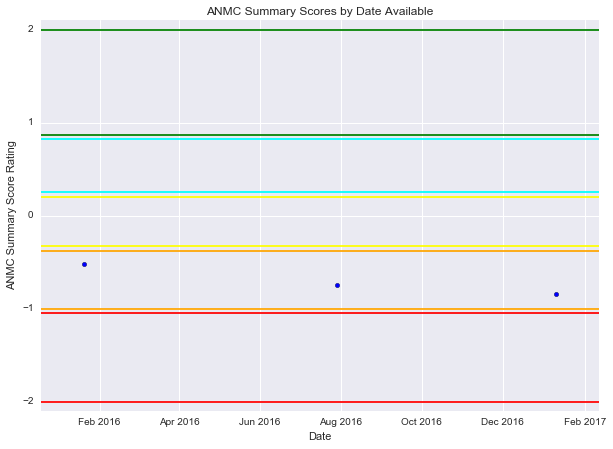

In [4]:
plt.figure(figsize=(10,7))
axes = plt.gca()
axes.set_ylim([-2.1,2.1])
plt.title("ANMC Summary Scores by Date Available")
plt.xlabel('Date')
plt.ylabel('ANMC Summary Score Rating')
plt.scatter(plot.index.values,plot['Summary Score']);
plt.axhline(y=-1.05,color='red')
plt.axhline(y=-1.00,color='orange')
plt.axhline(y=-.38,color='orange')
plt.axhline(y=-.33,color='yellow')
plt.axhline(y=.20,color='yellow')
plt.axhline(y=.25,color='cyan')
plt.axhline(y=.82,color='cyan')
plt.axhline(y=.87,color='green')
plt.axhline(y=2,color='green')
plt.axhline(y=-2,color='red')

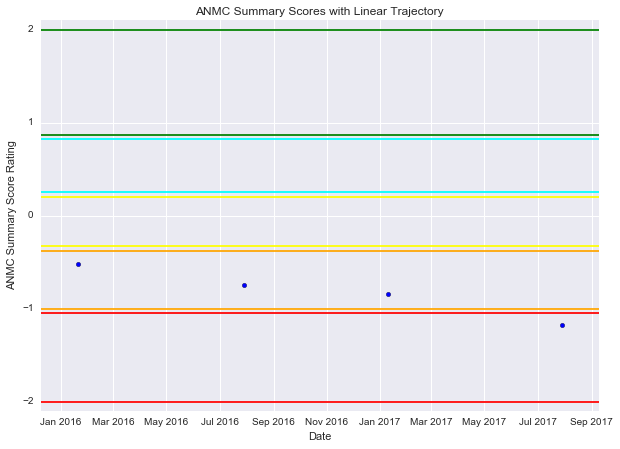

In [6]:
plot.set_value('2017-07-29','Summary Score',-1.18)
plot.set_value('2017-07-29','Star Rating',1)

plt.figure(figsize=(10,7))
axes = plt.gca()
axes.set_ylim([-2.1,2.1])
plt.title("ANMC Summary Scores with Linear Trajectory")
plt.xlabel('Date')
plt.ylabel('ANMC Summary Score Rating')
plt.scatter(plot.index.values,plot['Summary Score']);
plt.axhline(y=-1.05,color='red')
plt.axhline(y=-1.00,color='orange')
plt.axhline(y=-.38,color='orange')
plt.axhline(y=-.33,color='yellow')
plt.axhline(y=.20,color='yellow')
plt.axhline(y=.25,color='cyan')
plt.axhline(y=.82,color='cyan')
plt.axhline(y=.87,color='green')
plt.axhline(y=2,color='green')
plt.axhline(y=-2,color='red')